<a href="https://colab.research.google.com/github/Mvgrillo1357/Ai-Platform-Engineering/blob/master/cnn_fruit_classifier/vggClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Colab library to upload files to notebook
from google.colab import files

In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
!mkdir ~/.kaggle

In [0]:
import json
token = {"username":"michaelgrillo","key":"1b1b61b21b7bd669c2b170bf718b9cd8"}
with open ('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
with open ('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification -p /content --force

100% 3.57G/3.58G [01:29<00:00, 21.9MB/s]
100% 3.58G/3.58G [01:29<00:00, 43.1MB/s]


In [0]:
!unzip \*.zip

Archive:  fruits-fresh-and-rotten-for-classification.zip
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.15 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.22 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.01.41 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.02.43 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.03.40 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.16 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.04.24 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.05.34 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen Shot 2018-06-08 at 5.05.41 PM.png  
  inflating: dataset/dataset/test/freshapples/Screen 

In [0]:
!ls

dataset  fruits-fresh-and-rotten-for-classification.zip  sample_data


In [0]:
import pathlib
train_dir=pathlib.Path('dataset/train')
test_dir=pathlib.Path('dataset/test')

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
import tensorflow as tf
#AUTOTUNE = tf.data.experimental.AUTOTUNE
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as opt
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

TensorFlow 2.x selected.


In [0]:
image_count =len(list(train_dir.glob('*/*.png')))+ len(list(test_dir.glob('*/*.png')))
class_names=np.array([item.name for item in train_dir.glob('*') if item.name != 'LICENSE.txt'])
class_names

array(['rottenbanana', 'freshbanana', 'freshapples', 'rottenapples',
       'rottenoranges', 'freshoranges'], dtype='<U13')

In [0]:
test_generator= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
batch_size= 64
img_height= 224
img_width= 224
steps_per_epoch= np.ceil(image_count/batch_size)

In [0]:
train_data_gen = train_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     class_mode="sparse",
                                                     classes = list(class_names))
test_data_gen = test_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(img_height, img_width),
                                                     class_mode="sparse",
                                                     classes = list(class_names))

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [0]:
model=models.Sequential()


#model.add(layers.Conv2D(input_shape=(224, 224, 3), filters=8, kernel_size=(3,3),
#padding="same", activation="selu"))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="selu", input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(filters=64, kernel_size= (3,3), padding="same", activation="selu"))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation= "selu"))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation= "selu"))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="selu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='selu'))
model.add(layers.Dense(4096, activation='selu'))
model.add(layers.Dense(6, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)      

In [0]:
# Setup checkpoint callback - will save the model after each epoch if validation loss is lower than the previous checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint('./', save_best_only=True)

In [0]:
# Compiler
#op = opt.Adam(lr=.001)
op = opt.SGD(lr=.001, momentum=.9, nesterov=True)
model.compile(optimizer=op,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Training the data and validating with test data
history = model.fit(
        train_data_gen,
        epochs=35,        callbacks=[checkpoint],
        validation_data=test_data_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 171 steps, validate for 43 steps
Epoch 1/35
170/171 [============================>.] - ETA: 1s - loss: 0.9842 - sparse_categorical_accuracy: 0.7562WARNING:tensorflow:From /tensorflow-2.1.0/python3.6/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./assets
171/171 [==============================] - 215s 1s/step - loss: 0.9852 - sparse_categorical_accuracy: 0.7560 - val_loss: 2.7609 - val_sparse_categorical_accuracy: 0.5445
Epoch 2/35
171/171 [==============================] - 235s 1s/step - loss: 0.4763 - sparse_categorical_accuracy: 0.8700 - val_loss: 1.0500 - val_sparse_categorical_accuracy: 0.7869
Epoch 3/35
171/171 [===========================

  ...
    to  
  ['...']
43/43 - 13s - loss: 0.0817 - sparse_categorical_accuracy: 0.9752


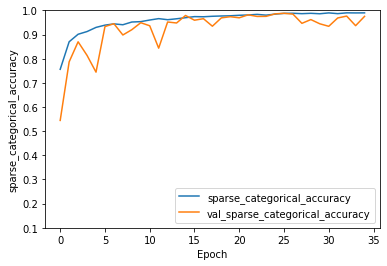

In [0]:
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('sparse_categorical_accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data_gen, verbose=2)

In [0]:
import base64

def save_model_signed(model, path):
    @tf.function(input_signature=[tf.TensorSpec(shape=[None, ], dtype=tf.string)])
    def preprocess_and_evaluate(b64_img):
        img = tf.image.decode_image(b64_img[0], dtype=tf.uint8)
        img.set_shape((None, None, 3))
        img = tf.image.resize(img, [224, 224])
        img = tf.reshape(img, (-1, 224, 224, 3))
        img = tf.cast(img, dtype=tf.float32) / 255


        return model(img)
    
    tf.saved_model.save(model, path, signatures=preprocess_and_evaluate)

In [0]:
save_model_signed(model,'')

INFO:tensorflow:Assets written to: assets
